# Preparation
### Importing Modules, Dataset, change to TF12

In [1]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
from tqdm import tqdm

In [2]:
!pip install tensorflow==2.12.0


INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 64.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 100.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 109.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 MB 27.3 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
   

In [2]:
tf.__version__

'2.12.0'

In [3]:
tf.random.set_seed(42)


In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
#Loading preprocessed Data

import zipfile
import os
import numpy as np
import pandas as pd

# Define paths
zip_file_path = "/content/drive/My Drive/EdgeAI/Data/processed_images2classes.zip"
unzip_folder = "/content/drive/My Drive/EdgeAI/Data/UTKprocessed/processed_images2classes"
os.makedirs(unzip_folder, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_folder)

print("Files unzipped successfully!")


Files unzipped successfully!


In [6]:
df = pd.read_csv("/content/drive/My Drive/EdgeAI/Data/UTKprocessed/processed_labels2classes.csv")
df

,image,age,gender,age_labels
0,../../Datasets/UTKFace/processed2classes\100_0...,100,0,1
1,../../Datasets/UTKFace/processed2classes\100_0...,100,0,1
2,../../Datasets/UTKFace/processed2classes\100_1...,100,1,1
3,../../Datasets/UTKFace/processed2classes\100_1...,100,1,1
4,../../Datasets/UTKFace/processed2classes\100_1...,100,1,1
...,...,...,...,...
18826,../../Datasets/UTKFace/processed2classes\99_1_...,99,1,1
18827,../../Datasets/UTKFace/processed2classes\99_1_...,99,1,1
18828,../../Datasets/UTKFace/processed2classes\99_1_...,99,1,1
18829,../../Datasets/UTKFace/processed2classes\99_1_...,99,1,1


In [ ]:
import os

colab_image_path = "/content/drive/My Drive/EdgeAI/Data/UTKprocessed/processed_images2classes/"

# Update the 'image' column to use the new path in Colab
df['image'] = df['image'].apply(lambda x: os.path.join(colab_image_path, os.path.basename(x)).replace("\\", "/"))

# Save the updated CSV file
updated_csv_path = "/content/drive/My Drive/EdgeAI/Data/UTKprocessed/processed_labels_colab2classes.csv"
df.to_csv(updated_csv_path, index=False)

print("CSV file updated with new paths.")



CSV file updated with new paths.


In [8]:
df = pd.read_csv("/content/drive/My Drive/EdgeAI/Data/UTKprocessed/processed_labels_colab2classes.csv")

df

,image,age,gender,age_labels
0,/content/drive/My Drive/EdgeAI/Data/UTKprocess...,100,0,1
1,/content/drive/My Drive/EdgeAI/Data/UTKprocess...,100,0,1
2,/content/drive/My Drive/EdgeAI/Data/UTKprocess...,100,1,1
3,/content/drive/My Drive/EdgeAI/Data/UTKprocess...,100,1,1
4,/content/drive/My Drive/EdgeAI/Data/UTKprocess...,100,1,1
...,...,...,...,...
18826,/content/drive/My Drive/EdgeAI/Data/UTKprocess...,99,1,1
18827,/content/drive/My Drive/EdgeAI/Data/UTKprocess...,99,1,1
18828,/content/drive/My Drive/EdgeAI/Data/UTKprocess...,99,1,1
18829,/content/drive/My Drive/EdgeAI/Data/UTKprocess...,99,1,1


In [10]:
import os
import shutil

# Define the source and destination paths
source_dir = "/content/drive/My Drive/EdgeAI/Data/UTKprocessed/processed_images2classes/"
destination_dir = "/content/drive/My Drive/EdgeAI/Data/UTKprocessed/processed_images2classes/processed2classes/"

# Ensure the destination directory exists
os.makedirs(destination_dir, exist_ok=True)

# Move each file from source to destination
for filename in os.listdir(source_dir):
    source_file = os.path.join(source_dir, filename)
    destination_file = os.path.join(destination_dir, filename)

    # Only move if it’s a file (to avoid moving directories if any)
    if os.path.isfile(source_file):
        shutil.move(source_file, destination_file)

print("Files moved successfully!")


Files moved successfully!


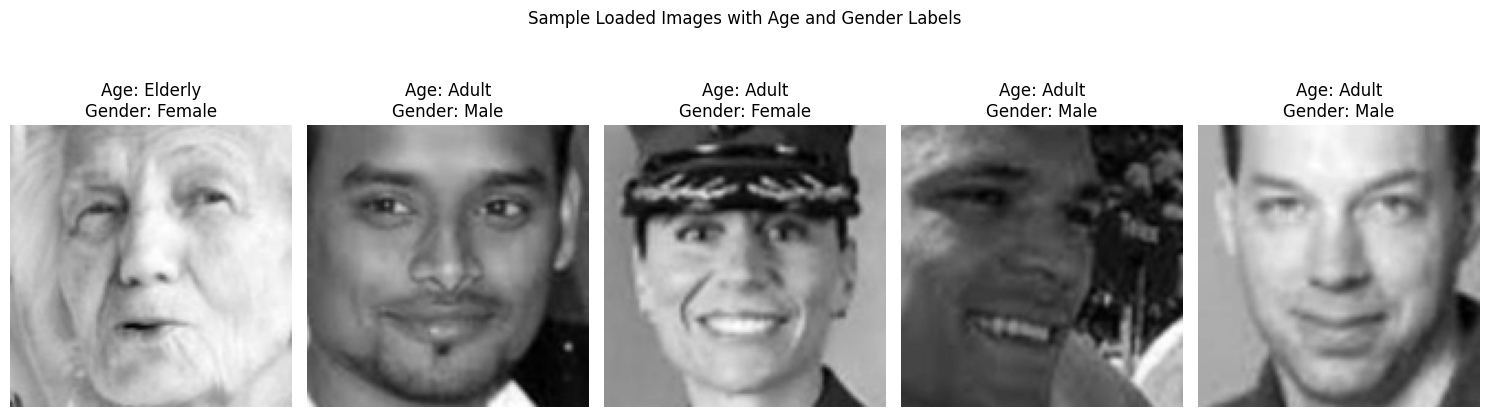

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load a few sample images from the processed folder for inspection
sample_images = df.sample(5)
plt.figure(figsize=(15, 5)) 

for i, (img_path, age_label, gender) in enumerate(zip(sample_images['image'], sample_images['age_labels'], sample_images['gender'])):
    # Load the image
    img = np.load(img_path)

    # Display the image in a subplot
    plt.subplot(1, 5, i + 1) 
    plt.imshow(img.squeeze(), cmap='gray') 
    plt.axis('off')

    # Set title with both age and gender
    gender_text = "Female" if gender == 1 else "Male"  
    age_label = "Elderly" if age_label == 1 else "Adult" 

    plt.title(f"Age: {age_label}\nGender: {gender_text}")

plt.suptitle("Sample Loaded Images with Age and Gender Labels")
plt.tight_layout() 
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

# Load images as a NumPy array from the paths in the DataFrame
X = np.array([np.load(img_path) for img_path in df['image']])

# Define labels
y_age = np.array(df['age_labels'])
y_gender = np.array(df['gender'])

# Create a combined label for stratification
combined_labels = list(zip(y_age, y_gender)) 

# Split data to train, val and test
X_train, X_temp, y_age_train, y_age_temp, y_gender_train, y_gender_temp = train_test_split(
    X, y_age, y_gender, test_size=0.3, random_state=42, stratify=combined_labels
)

combined_labels_temp = list(zip(y_age_temp, y_gender_temp))

X_val, X_test, y_age_val, y_age_test, y_gender_val, y_gender_test = train_test_split(
    X_temp, y_age_temp, y_gender_temp, test_size=0.5, random_state=42, stratify=combined_labels_temp
)

# Check the distribution in each split
print("Training gender distribution:", np.unique(y_gender_train, return_counts=True))
print("Validation gender distribution:", np.unique(y_gender_val, return_counts=True))
print("Test gender distribution:", np.unique(y_gender_test, return_counts=True))


Training gender distribution: (array([0, 1]), array([7114, 6067]))
Validation gender distribution: (array([0, 1]), array([1525, 1300]))
Test gender distribution: (array([0, 1]), array([1525, 1300]))


In [17]:

# Check the distribution in each split
print("Training gender distribution:", np.unique(y_age_train, return_counts=True))
print("Validation gender distribution:", np.unique(y_age_val, return_counts=True))
print("Test gender distribution:", np.unique(y_age_test, return_counts=True))


Training gender distribution: (array([0, 1]), array([9689, 3492]))
Validation gender distribution: (array([0, 1]), array([2076,  749]))
Test gender distribution: (array([0, 1]), array([2077,  748]))


In [16]:
np.unique(y_age_test)

array([0, 1])

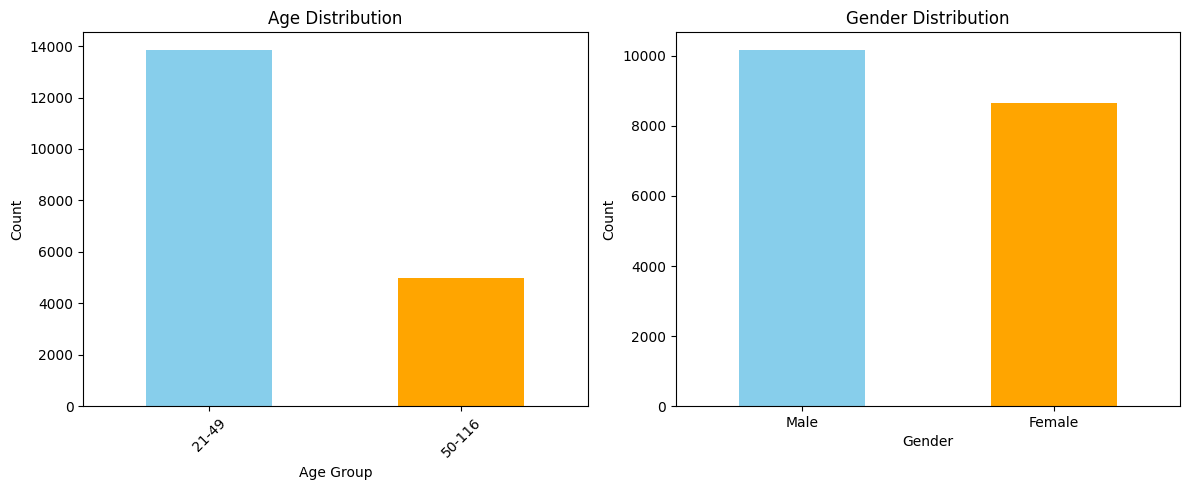

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_distribution(df, bins=None, labels=None):
 
    if bins and labels:
        df['age_labels'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

    # Plot Age Distribution
    plt.figure(figsize=(12, 5))

    # Age distribution with custom bins
    plt.subplot(1, 2, 1)
    df['age_labels'].value_counts(sort=False).plot(kind='bar', color=('skyblue', 'orange'))
    plt.title('Age Distribution')
    plt.xlabel('Age Group')
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    # Gender distribution
    plt.subplot(1, 2, 2)
    df['gender'].value_counts().plot(kind='bar', color=('skyblue', 'orange'))
    plt.title('Gender Distribution')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.xticks([0, 1], ['Male', 'Female'], rotation=0)

    plt.tight_layout()
    plt.show()


bins = [21, 50, 117]
labels = ["21-49", "50-116"] 

plot_distribution(df, bins=bins, labels=labels)


# Training CNN

In [ ]:
input_shape = (128, 128, 1)

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Define input shape
input_shape = (128, 128, 1)

# Define the CNN architecture
inputs = Input(shape=input_shape)

# Convolutional and pooling layers with Batch Normalization
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
bn_1 = BatchNormalization()(conv_1)
maxp_1 = MaxPooling2D(pool_size=(2, 2))(bn_1)

conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu')(maxp_1)
bn_2 = BatchNormalization()(conv_2)
maxp_2 = MaxPooling2D(pool_size=(2, 2))(bn_2)

conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu')(maxp_2)
bn_3 = BatchNormalization()(conv_3)
maxp_3 = MaxPooling2D(pool_size=(2, 2))(bn_3)

conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu')(maxp_3)
bn_4 = BatchNormalization()(conv_4)
maxp_4 = MaxPooling2D(pool_size=(2, 2))(bn_4)

# Flatten
flatten = Flatten()(maxp_4)

# Fully connected layers with Batch Normalization
dense_1 = Dense(256, activation='relu')(flatten)
bn_dense_1 = BatchNormalization()(dense_1)
dropout_2 = Dropout(0.5)(bn_dense_1)

dense_2 = Dense(256, activation='relu')(flatten)
bn_dense_2 = BatchNormalization()(dense_2)
dropout_3 = Dropout(0.5)(bn_dense_2)


age_output = Dense(1, activation='sigmoid', name="age_output")(dropout_2)
gender_output = Dense(1, activation='sigmoid', name="gender_output")(dropout_3)

# Combine inputs and outputs into a model
model = Model(inputs=inputs, outputs=[age_output, gender_output])

# Compile the model
model.compile(
    optimizer=Adam(), 
    loss={
        "age_output": "binary_crossentropy",
        "gender_output": "binary_crossentropy"
    },
    metrics={
        "age_output": "accuracy",
        "gender_output": "accuracy"
    }
)

model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 126, 126, 32  320         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 126, 126, 32  128        ['conv2d[0][0]']                 
 alization)                     )                                                             

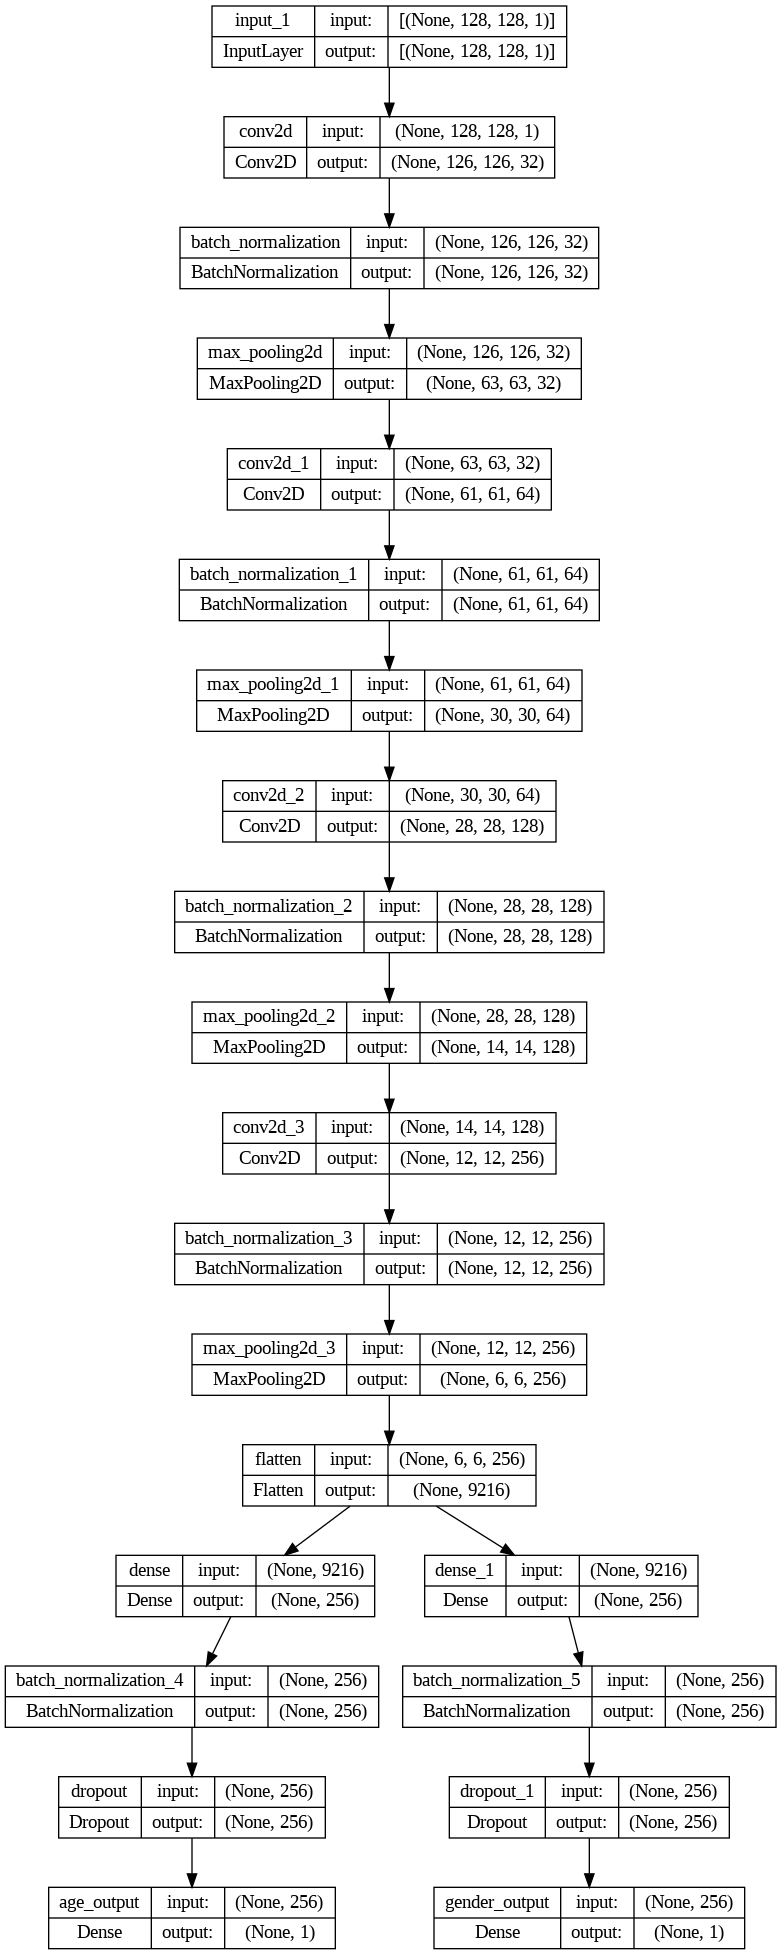

In [22]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file="/content/drive/My Drive/EdgeAI/Results/2classesagegender_architecture.png", show_shapes=True, show_layer_names=True)


In [23]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [ ]:
# Fitting the model

history = model.fit(
    x=X_train,
    y={
        "age_output": y_age_train,  
        "gender_output": y_gender_train

    },
    validation_data=(
        X_val,
        {
            "age_output": y_age_val,
            "gender_output": y_gender_val
        }
    ),
    batch_size=128, 
    epochs=20, 
    verbose=1
)


Epoch 1/20
103/103 [==============================] - 55s 506ms/step - loss: 0.9242 - age_output_loss: 0.5390 - gender_output_loss: 0.3853 - age_output_accuracy: 0.7723 - gender_output_accuracy: 0.8535 - val_loss: 2.8756 - val_age_output_loss: 1.8186 - val_gender_output_loss: 1.0570 - val_age_output_accuracy: 0.2651 - val_gender_output_accuracy: 0.5398
Epoch 2/20
103/103 [==============================] - 52s 501ms/step - loss: 0.5527 - age_output_loss: 0.3350 - gender_output_loss: 0.2178 - age_output_accuracy: 0.8616 - gender_output_accuracy: 0.9177 - val_loss: 4.0445 - val_age_output_loss: 3.1964 - val_gender_output_loss: 0.8481 - val_age_output_accuracy: 0.2651 - val_gender_output_accuracy: 0.5398
Epoch 3/20
103/103 [==============================] - 51s 499ms/step - loss: 0.4421 - age_output_loss: 0.2775 - gender_output_loss: 0.1645 - age_output_accuracy: 0.8841 - gender_output_accuracy: 0.9405 - val_loss: 2.8538 - val_age_output_loss: 2.3021 - val_gender_output_loss: 0.5517 - val_

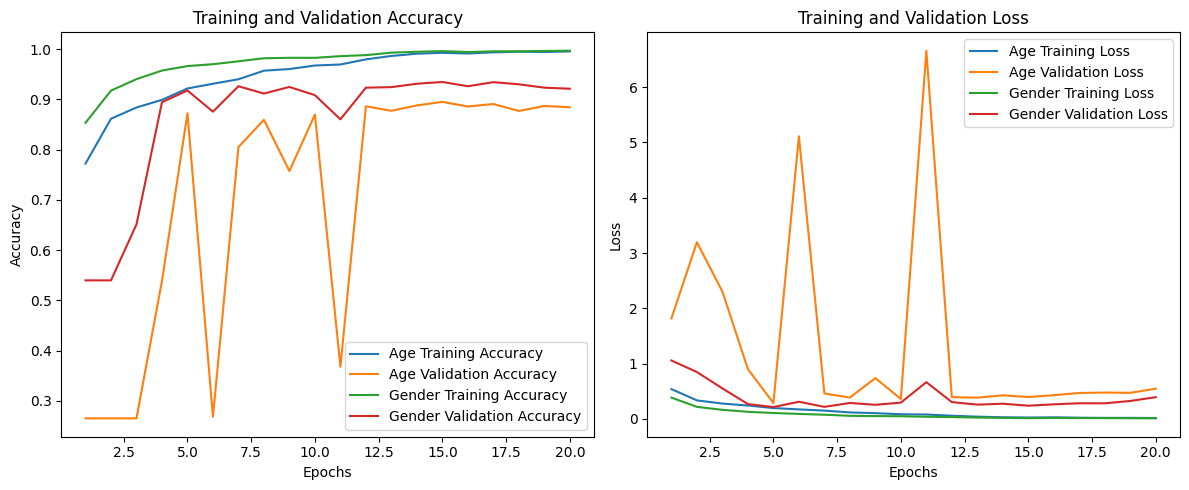

In [25]:
import matplotlib.pyplot as plt

# Extract metrics from the history object
age_accuracy = history.history['age_output_accuracy']
val_age_accuracy = history.history['val_age_output_accuracy']
gender_accuracy = history.history['gender_output_accuracy']
val_gender_accuracy = history.history['val_gender_output_accuracy']

age_loss = history.history['age_output_loss']
val_age_loss = history.history['val_age_output_loss']
gender_loss = history.history['gender_output_loss']
val_gender_loss = history.history['val_gender_output_loss']

epochs = range(1, len(age_accuracy) + 1)

# Plot Accuracy
plt.figure(figsize=(12, 5))

# Age accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, age_accuracy, label='Age Training Accuracy')
plt.plot(epochs, val_age_accuracy, label='Age Validation Accuracy')
plt.plot(epochs, gender_accuracy, label='Gender Training Accuracy')
plt.plot(epochs, val_gender_accuracy, label='Gender Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, age_loss, label='Age Training Loss')
plt.plot(epochs, val_age_loss, label='Age Validation Loss')
plt.plot(epochs, gender_loss, label='Gender Training Loss')
plt.plot(epochs, val_gender_loss, label='Gender Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# Saving Models

In [ ]:
# Keras Format
model.save("/content/drive/My Drive/EdgeAI/Results/2classes_final_age_gender_model.keras")

In [ ]:
# TF-Lite Format

import tensorflow as tf

# Convert the model to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model
with open("/content/drive/My Drive/EdgeAI/Results/2classes_final_age_gender_model.tflite", "wb") as f:
    f.write(tflite_model)


In [ ]:
# quantized Format

converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

with open("/content/drive/My Drive/EdgeAI/Results/2classes_final_age_gender_model_quant.tflite", "wb") as f:
    f.write(tflite_model)


# Testing Performance on Test Set

## Keras Model

In [ ]:
# Evaluate the keras model

evaluation = model.evaluate(X_test, [y_age_test, y_gender_test], verbose=1)

# Display the evaluation results
print(f"Model Evaluation Results: {evaluation}")
print(f"Total Loss: {evaluation[0]:.4f}")
print(f"Age Output Loss: {evaluation[1]:.4f}")
print(f"Gender Output Loss: {evaluation[2]:.4f}")
print(f"Age Output Accuracy: {evaluation[3]:.4f}")
print(f"Gender Output Accuracy: {evaluation[4]:.4f}")


89/89 [==============================] - 4s 43ms/step - loss: 0.8725 - age_output_loss: 0.5544 - gender_output_loss: 0.3181 - age_output_accuracy: 0.8821 - gender_output_accuracy: 0.9310
Model Evaluation Results: [0.8724627494812012, 0.554364025592804, 0.3180983364582062, 0.8821238875389099, 0.930973470211029]
Total Loss: 0.8725
Age Output Loss: 0.5544
Gender Output Loss: 0.3181
Age Output Accuracy: 0.8821
Gender Output Accuracy: 0.9310


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Generate predictions from the model
predictions = model.predict(X_test)
age_predictions = predictions[0]      
gender_predictions = predictions[1]    

age_predictions = (age_predictions > 0.5).astype("int32").flatten()
gender_predictions = (gender_predictions > 0.5).astype("int32").flatten()

if y_gender_test.ndim > 1: 
    y_gender_test = np.argmax(y_gender_test, axis=1)
if y_age_test.ndim > 1: 
    y_age_test = np.argmax(y_age_test, axis=1)

def evaluate_predictions(y_test_gender, y_test_age, gender_predictions, age_predictions):
    gender_accuracy = accuracy_score(y_test_gender, gender_predictions)
    age_accuracy = accuracy_score(y_test_age, age_predictions)

    # Print classification reports
    print("Gender Classification Report:")
    print(classification_report(y_test_gender, gender_predictions, target_names=["Male", "Female"]))

    print("\nAge Classification Report:")
    print(classification_report(y_test_age, age_predictions, target_names=["Under 30", "30 and Above"]))

    print(f"\nGender Accuracy: {gender_accuracy:.4f}")
    print(f"Age Accuracy: {age_accuracy:.4f}")


evaluate_predictions(y_gender_test, y_age_test, gender_predictions, age_predictions)


89/89 [==============================] - 4s 43ms/step
Gender Classification Report:
              precision    recall  f1-score   support

        Male       0.91      0.97      0.94      1525
      Female       0.96      0.88      0.92      1300

    accuracy                           0.93      2825
   macro avg       0.94      0.93      0.93      2825
weighted avg       0.93      0.93      0.93      2825


Age Classification Report:
              precision    recall  f1-score   support

    Under 30       0.92      0.92      0.92      2077
30 and Above       0.78      0.78      0.78       748

    accuracy                           0.88      2825
   macro avg       0.85      0.85      0.85      2825
weighted avg       0.88      0.88      0.88      2825


Gender Accuracy: 0.9310
Age Accuracy: 0.8821


Unique values in y_test_gender: [0 1]
Unique values in gender_predictions: [0 1]
Original unique values in y_test_gender: [0 1]


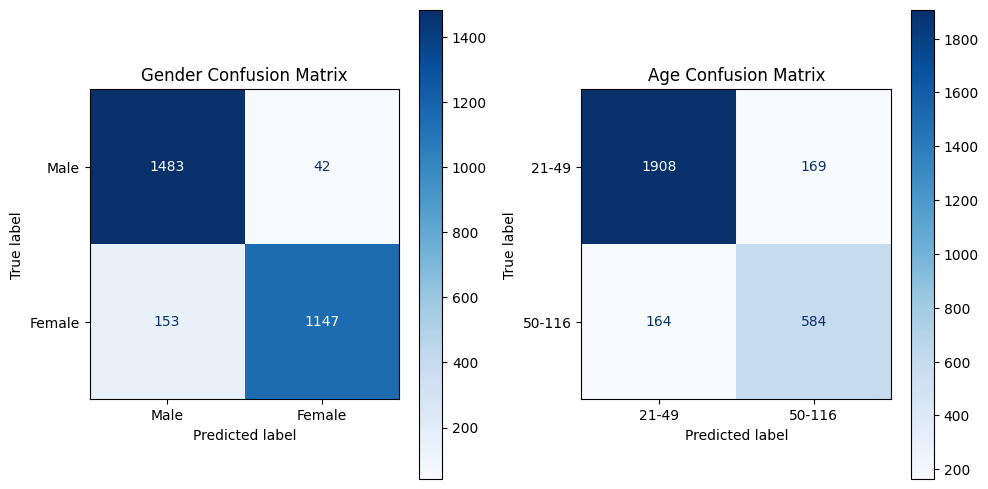

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrices(y_test_gender, y_test_age, gender_predictions, age_predictions):
    if y_test_gender.ndim > 1: 
        y_test_gender = np.argmax(y_test_gender, axis=1)
    if gender_predictions.ndim > 1: 
        gender_predictions = np.argmax(gender_predictions, axis=1)

    if y_test_age.ndim > 1:
        y_test_age = np.argmax(y_test_age, axis=1)
    if age_predictions.ndim > 1: 
        age_predictions = np.argmax(age_predictions, axis=1)

    # Print unique values for verification
    print("Unique values in y_test_gender:", np.unique(y_test_gender))
    print("Unique values in gender_predictions:", np.unique(gender_predictions))
    print("Original unique values in y_test_gender:", np.unique(y_test_gender))

    gender_cm = confusion_matrix(y_test_gender, gender_predictions)
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)

    ConfusionMatrixDisplay(gender_cm, display_labels=["Male", "Female"]).plot(cmap="Blues", ax=plt.gca())
    plt.title("Gender Confusion Matrix")

    age_cm = confusion_matrix(y_test_age, age_predictions)
    plt.subplot(1, 2, 2)
    ConfusionMatrixDisplay(age_cm, display_labels=["21-49", "50-116"]).plot(cmap="Blues", ax=plt.gca())
    plt.title("Age Confusion Matrix")

    plt.tight_layout()
    plt.show()

plot_confusion_matrices(y_gender_test, y_age_test, gender_predictions, age_predictions)


## TF-Lite

In [32]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

# Load the TFLite model
tflite_model_path = "/content/drive/My Drive/EdgeAI/Results/2classes_final_age_gender_model.tflite"
interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()


In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.losses import BinaryCrossentropy

def evaluate_tflite_model_with_accuracy_and_loss(interpreter, X_test, y_age_test, y_gender_test):
    y_gender_test = y_gender_test.reshape(-1, 1)
    y_age_test = y_age_test.reshape(-1, 1)  

    # Initialize accuracy counters and loss
    correct_age_predictions = 0
    correct_gender_predictions = 0
    total_age_loss = 0
    total_gender_loss = 0
    num_samples = len(X_test)

    # Define loss functions
    age_loss_fn = BinaryCrossentropy()
    gender_loss_fn = BinaryCrossentropy()

    # Get input and output details for the interpreter
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    # Loop over each test sample
    for i in range(num_samples):

        # Prepare the input data
        input_data = np.expand_dims(X_test[i], axis=0).astype(np.float32)
        interpreter.set_tensor(input_details[0]['index'], input_data)

        # Run inference
        interpreter.invoke()

        # Get predictions for age and gender
        age_pred = interpreter.get_tensor(output_details[0]['index'])  
        gender_pred = interpreter.get_tensor(output_details[1]['index']) 

        # Calculate accuracy
        if (age_pred > 0.5).astype("int32").flatten()[0] == y_age_test[i][0]:  
            correct_age_predictions += 1
        if (gender_pred > 0.5).astype("int32").flatten()[0] == y_gender_test[i][0]: 
            correct_gender_predictions += 1

        # Calculate loss
        total_age_loss += age_loss_fn(y_age_test[i:i+1], age_pred).numpy()
        total_gender_loss += gender_loss_fn(y_gender_test[i:i+1], gender_pred).numpy()

    # Calculate average accuracy and loss
    age_accuracy = correct_age_predictions / num_samples
    gender_accuracy = correct_gender_predictions / num_samples
    avg_age_loss = total_age_loss / num_samples
    avg_gender_loss = total_gender_loss / num_samples

    print(f"Age Accuracy: {age_accuracy:.4f}")
    print(f"Gender Accuracy: {gender_accuracy:.4f}")
    print(f"Average Age Loss: {avg_age_loss:.4f}")
    print(f"Average Gender Loss: {avg_gender_loss:.4f}")


evaluate_tflite_model_with_accuracy_and_loss(interpreter, X_test, y_age_test, y_gender_test)


Age Accuracy: 0.8821
Gender Accuracy: 0.9310
Average Age Loss: 0.5498
Average Gender Loss: 0.3045


## Quantized Model

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.losses import BinaryCrossentropy

# Load the quantized TFLite model
quant_tflite_model_path = "/content/drive/My Drive/EdgeAI/Results/2classes_final_age_gender_model_quant.tflite"
quant_interpreter = tf.lite.Interpreter(model_path=quant_tflite_model_path)
quant_interpreter.allocate_tensors()

# Get input and output details for the quantized interpreter
input_details = quant_interpreter.get_input_details()
output_details = quant_interpreter.get_output_details()

def evaluate_quantized_tflite_model(interpreter, X_test, y_age_test, y_gender_test):
    y_gender_test = y_gender_test.reshape(-1, 1)
    y_age_test = y_age_test.reshape(-1, 1) 

    # Initialize accuracy counters and loss
    correct_age_predictions = 0
    correct_gender_predictions = 0
    total_age_loss = 0
    total_gender_loss = 0
    num_samples = len(X_test)

    # Define loss functions
    age_loss_fn = BinaryCrossentropy()
    gender_loss_fn = BinaryCrossentropy()

    # Loop over each test sample
    for i in range(num_samples):
        # Prepare the input data
        input_data = np.expand_dims(X_test[i], axis=0).astype(np.float32)
        interpreter.set_tensor(input_details[0]['index'], input_data)

        # Run inference
        interpreter.invoke()

        # Get predictions for age and gender
        age_pred = interpreter.get_tensor(output_details[0]['index']) 
        gender_pred = interpreter.get_tensor(output_details[1]['index'])  

        # Calculate accuracy
        if (age_pred > 0.5).astype("int32").flatten()[0] == y_age_test[i][0]:
            correct_age_predictions += 1
        if (gender_pred > 0.5).astype("int32").flatten()[0] == y_gender_test[i][0]:
            correct_gender_predictions += 1

        # Calculate loss
        total_age_loss += age_loss_fn(y_age_test[i:i+1], age_pred).numpy()
        total_gender_loss += gender_loss_fn(y_gender_test[i:i+1], gender_pred).numpy()

    # Calculate average accuracy and loss
    age_accuracy = correct_age_predictions / num_samples
    gender_accuracy = correct_gender_predictions / num_samples
    avg_age_loss = total_age_loss / num_samples
    avg_gender_loss = total_gender_loss / num_samples

    print(f"Age Accuracy: {age_accuracy:.4f}")
    print(f"Gender Accuracy: {gender_accuracy:.4f}")
    print(f"Average Age Loss: {avg_age_loss:.4f}")
    print(f"Average Gender Loss: {avg_gender_loss:.4f}")

evaluate_quantized_tflite_model(quant_interpreter, X_test, y_age_test, y_gender_test)


Age Accuracy: 0.8828
Gender Accuracy: 0.9303
Average Age Loss: 0.5485
Average Gender Loss: 0.3031


# Building Model with Pruning

In [36]:
pip install tensorflow-model-optimization


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 15.3 MB/s eta 0:00:00


In [37]:
num_images = X_train.shape[0]
batch_size = 128
epochs = 20
end_step = np.ceil(num_images / batch_size).astype(np.int32) * epochs

In [ ]:
import tensorflow as tf
import tensorflow_model_optimization as tfmot
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model

def create_pruned_model(input_shape=(128, 128, 1)):
    inputs = Input(shape=input_shape)

    conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
    maxp_1 = MaxPooling2D(pool_size=(2, 2))(conv_1)

    conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu')(maxp_1)
    maxp_2 = MaxPooling2D(pool_size=(2, 2))(conv_2)

    conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu')(maxp_2)
    maxp_3 = MaxPooling2D(pool_size=(2, 2))(conv_3)

    conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu')(maxp_3)
    maxp_4 = MaxPooling2D(pool_size=(2, 2))(conv_4)

    flatten = Flatten()(maxp_4)

    dense_1 = Dense(256, activation='relu')(flatten)
    dropout_2 = Dropout(0.3)(dense_1)

    dense_2 = Dense(256, activation='relu')(flatten)
    dropout_3 = Dropout(0.3)(dense_2)

    age_output = Dense(1, activation='sigmoid', name="age_output")(dropout_2)

    gender_output = Dense(1, activation='sigmoid', name="gender_output")(dropout_3)  


    model = Model(inputs=inputs, outputs=[age_output, gender_output])

    pruning_params = {
        'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(
            initial_sparsity=0.5, final_sparsity=0.8, begin_step=0, end_step=end_step
        )
    }
    pruned_model = tfmot.sparsity.keras.prune_low_magnitude(model, **pruning_params)

    pruned_model.compile(
        optimizer="adam",
        loss={
            "prune_low_magnitude_age_output": "binary_crossentropy",
            "prune_low_magnitude_gender_output": "binary_crossentropy"
        },
        metrics={
            "prune_low_magnitude_age_output": "accuracy",
            "prune_low_magnitude_gender_output": "accuracy"
        }
    )


    return pruned_model

pruned_model = create_pruned_model()

pruning_callback = tfmot.sparsity.keras.UpdatePruningStep()


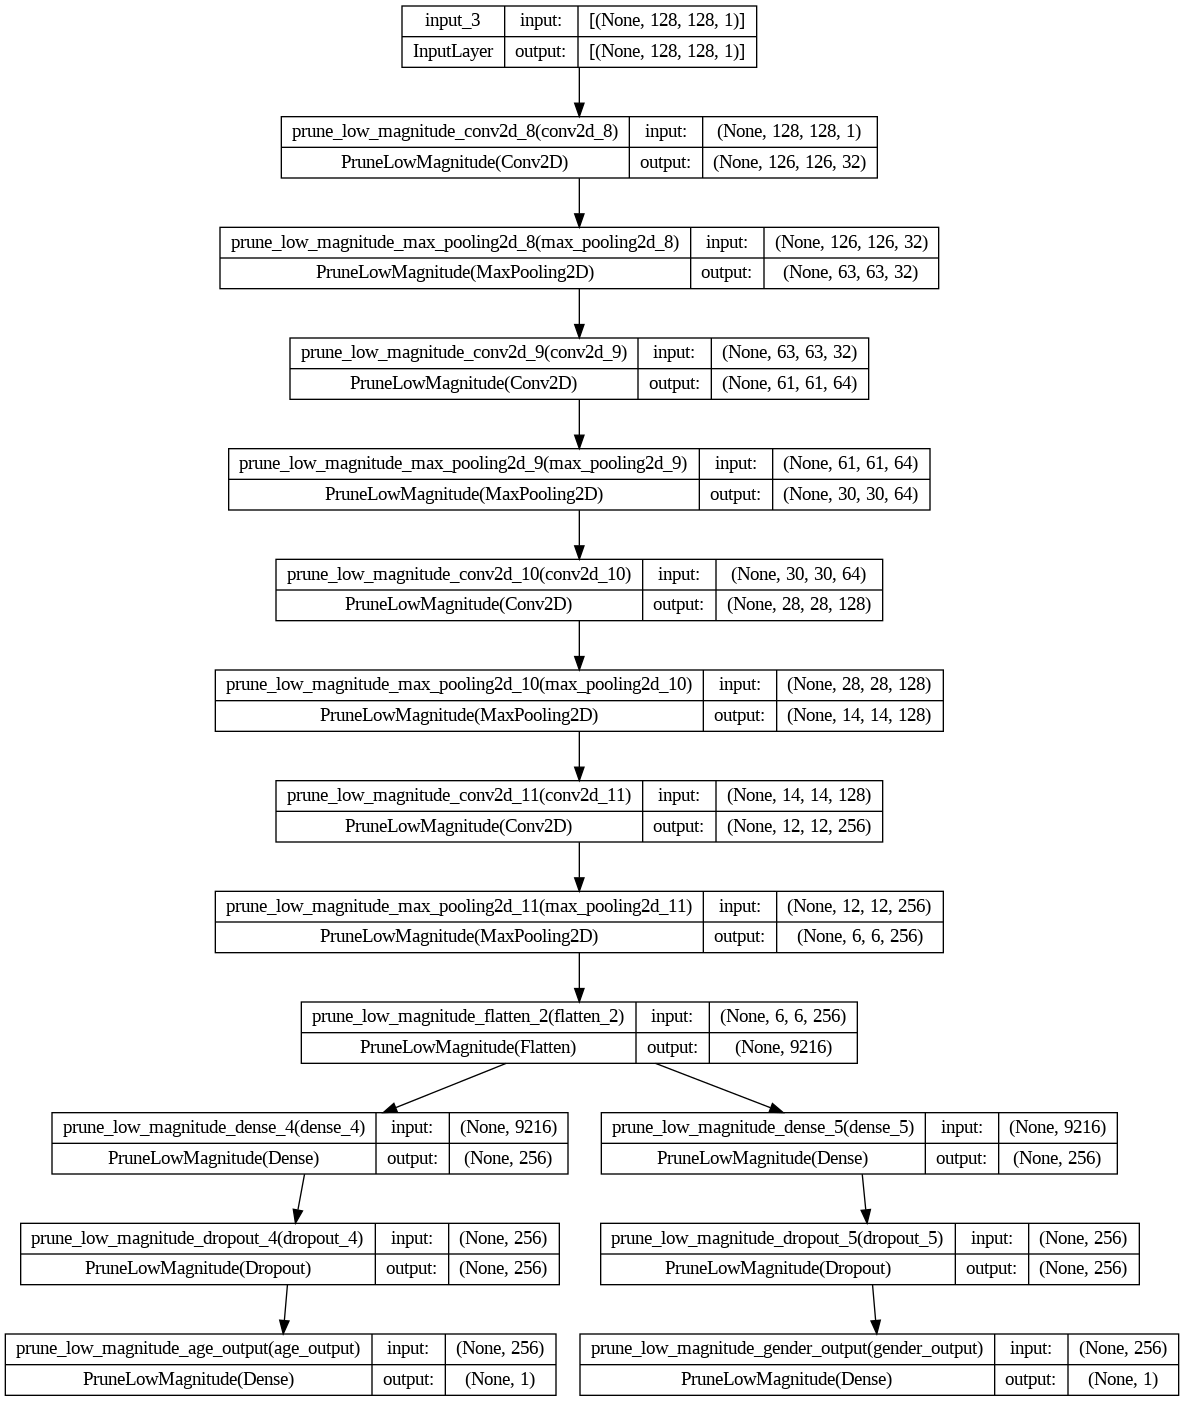

In [40]:
from tensorflow.keras.utils import plot_model
plot_model(pruned_model, to_file="/content/drive/My Drive/EdgeAI/Results/2classesagegender_pruned_architecture.png", show_shapes=True, show_layer_names=True)


In [ ]:

final_pruned_cnn_history = pruned_model.fit(
    x=X_train,
    y={
        "prune_low_magnitude_age_output": y_age_train,
        "prune_low_magnitude_gender_output": y_gender_train
    },
    validation_data=(
        X_val,
        {
            "prune_low_magnitude_age_output": y_age_val,
            "prune_low_magnitude_gender_output": y_gender_val
        }
    ),
    batch_size=batch_size, 
    epochs=epochs,  
    verbose=1,
    callbacks=[pruning_callback],  # Pruning callback
)


Epoch 1/20
103/103 [==============================] - 47s 399ms/step - loss: 1.0705 - prune_low_magnitude_age_output_loss: 0.5211 - prune_low_magnitude_gender_output_loss: 0.5494 - prune_low_magnitude_age_output_accuracy: 0.7439 - prune_low_magnitude_gender_output_accuracy: 0.7110 - val_loss: 0.8989 - val_prune_low_magnitude_age_output_loss: 0.4632 - val_prune_low_magnitude_gender_output_loss: 0.4357 - val_prune_low_magnitude_age_output_accuracy: 0.7823 - val_prune_low_magnitude_gender_output_accuracy: 0.8425
Epoch 2/20
103/103 [==============================] - 40s 390ms/step - loss: 0.7717 - prune_low_magnitude_age_output_loss: 0.4292 - prune_low_magnitude_gender_output_loss: 0.3425 - prune_low_magnitude_age_output_accuracy: 0.8059 - prune_low_magnitude_gender_output_accuracy: 0.8561 - val_loss: 0.7429 - val_prune_low_magnitude_age_output_loss: 0.3988 - val_prune_low_magnitude_gender_output_loss: 0.3441 - val_prune_low_magnitude_age_output_accuracy: 0.8255 - val_prune_low_magnitude_g

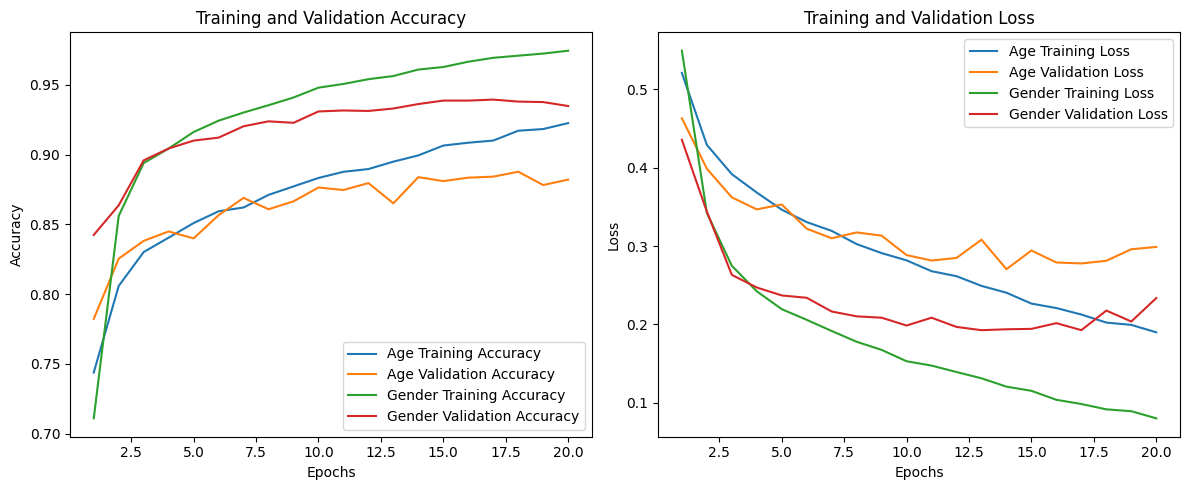

In [42]:
# Extract metrics from the history object using prefixed names
age_accuracy = final_pruned_cnn_history.history['prune_low_magnitude_age_output_accuracy']
val_age_accuracy = final_pruned_cnn_history.history['val_prune_low_magnitude_age_output_accuracy']
gender_accuracy = final_pruned_cnn_history.history['prune_low_magnitude_gender_output_accuracy']
val_gender_accuracy = final_pruned_cnn_history.history['val_prune_low_magnitude_gender_output_accuracy']

age_loss = final_pruned_cnn_history.history['prune_low_magnitude_age_output_loss']
val_age_loss = final_pruned_cnn_history.history['val_prune_low_magnitude_age_output_loss']
gender_loss = final_pruned_cnn_history.history['prune_low_magnitude_gender_output_loss']
val_gender_loss = final_pruned_cnn_history.history['val_prune_low_magnitude_gender_output_loss']

epochs = range(1, len(age_accuracy) + 1)

# Plot Accuracy
plt.figure(figsize=(12, 5))

# Age accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, age_accuracy, label='Age Training Accuracy')
plt.plot(epochs, val_age_accuracy, label='Age Validation Accuracy')
plt.plot(epochs, gender_accuracy, label='Gender Training Accuracy')
plt.plot(epochs, val_gender_accuracy, label='Gender Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, age_loss, label='Age Training Loss')
plt.plot(epochs, val_age_loss, label='Age Validation Loss')
plt.plot(epochs, gender_loss, label='Gender Training Loss')
plt.plot(epochs, val_gender_loss, label='Gender Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# Save the Pruned Model

In [44]:
# Strip the pruning wrappers
pruned_model = tfmot.sparsity.keras.strip_pruning(pruned_model)

# Save the pruned model
pruned_model.save('/content/drive/My Drive/EdgeAI/Results/2classes_final_pruned_agegender.keras')

In [45]:
# Convert the pruned model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(pruned_model)
tflite_model = converter.convert()

# Save the TFLite model
with open('/content/drive/My Drive/EdgeAI/Results/2classes_final_pruned_agegender.tflite', 'wb') as f:
    f.write(tflite_model)


In [ ]:

# Convert the pruned model to TFLite format with quantization
converter = tf.lite.TFLiteConverter.from_keras_model(pruned_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]  
tflite_quantized_pruned_model = converter.convert()

# Save the quantized TFLite model
with open('/content/drive/My Drive/EdgeAI/Results/2classes_final_pruned_quant_agegender.tflite', 'wb') as f:
    f.write(tflite_quantized_pruned_model)


## Testing the pruned model on the test set

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.losses import BinaryCrossentropy

# Load the quantized TFLite model
quant_tflite_model_path = "/content/drive/My Drive/EdgeAI/Results/2classes_final_pruned_quant_agegender.tflite"
quant_interpreter = tf.lite.Interpreter(model_path=quant_tflite_model_path)
quant_interpreter.allocate_tensors()

# Get input and output details for the quantized interpreter
input_details = quant_interpreter.get_input_details()
output_details = quant_interpreter.get_output_details()

def evaluate_quantized_tflite_model(interpreter, X_test, y_age_test, y_gender_test):
    # Reshape labels to ensure correct format for BinaryCrossentropy
    y_age_test = y_age_test.reshape(-1, 1)
    y_gender_test = y_gender_test.reshape(-1, 1)

    # Initialize accuracy counters and total losses for age and gender predictions
    correct_age_predictions = 0
    correct_gender_predictions = 0
    total_age_loss = 0
    total_gender_loss = 0
    num_samples = len(X_test)

    # Define loss functions for age and gender
    age_loss_fn = BinaryCrossentropy()
    gender_loss_fn = BinaryCrossentropy()

    # Iterate over each test sample to compute predictions, accuracy, and loss
    for i in range(num_samples):
        # Prepare the input data
        input_data = np.expand_dims(X_test[i], axis=0).astype(np.float32)
        interpreter.set_tensor(input_details[0]['index'], input_data)

        # Run inference
        interpreter.invoke()

        # Get predictions for age and gender
        age_pred = interpreter.get_tensor(output_details[0]['index']) 
        gender_pred = interpreter.get_tensor(output_details[1]['index'])  

        # Calculate accuracy for age and gender
        if (age_pred > 0.5).astype("int32").flatten()[0] == y_age_test[i][0]:
            correct_age_predictions += 1
        if (gender_pred > 0.5).astype("int32").flatten()[0] == y_gender_test[i][0]:
            correct_gender_predictions += 1

        # Calculate loss for each output
        total_age_loss += age_loss_fn(y_age_test[i:i+1], age_pred).numpy()
        total_gender_loss += gender_loss_fn(y_gender_test[i:i+1], gender_pred).numpy()

    # Calculate average accuracy and loss for both age and gender outputs
    age_accuracy = correct_age_predictions / num_samples
    gender_accuracy = correct_gender_predictions / num_samples
    avg_age_loss = total_age_loss / num_samples
    avg_gender_loss = total_gender_loss / num_samples

    # Print results
    print(f"Age Accuracy: {age_accuracy:.4f}")
    print(f"Gender Accuracy: {gender_accuracy:.4f}")
    print(f"Average Age Loss: {avg_age_loss:.4f}")
    print(f"Average Gender Loss: {avg_gender_loss:.4f}")


evaluate_quantized_tflite_model(quant_interpreter, X_test, y_age_test, y_gender_test)


Age Accuracy: 0.8786
Gender Accuracy: 0.9395
Average Age Loss: 0.3056
Average Gender Loss: 0.1879
